In [ ]:
!pip3 install pickle5

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pickle5 as pickle
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 7.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/AI project/Dataset5', 'rb') as handle:
    train_x = pickle.load(handle)
    train_y = pickle.load(handle)
    test_x = pickle.load(handle)
    test_y = pickle.load(handle)

In [ ]:
print('train x :',train_x.shape,'train y :',train_y.shape,'test x :',test_x.shape,'test y :',test_y.shape)

train x : (391500, 300) train y : (391500,) test x : (167650, 300) test y : (167650,)


In [ ]:
pd.DataFrame(train_x).describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,391500.00000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,...,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000,391500.000000
mean,132.33905,132.453676,122.463027,132.317637,132.440342,122.439006,132.288618,132.415027,122.421361,132.253305,...,121.282230,131.558146,131.553469,121.269466,131.540089,131.532135,121.241226,131.494613,131.486598,121.199269
std,65.72883,66.009981,73.766281,65.703052,65.993691,73.778645,65.730618,66.014624,73.793829,65.756443,...,73.448622,65.605069,65.834641,73.462144,65.596667,65.837770,73.454690,65.609769,65.843740,73.441240
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81.00000,80.000000,59.000000,81.000000,80.000000,59.000000,81.000000,80.000000,59.000000,81.000000,...,58.000000,80.000000,80.000000,59.000000,80.000000,80.000000,59.000000,80.000000,80.000000,59.000000
50%,133.00000,131.000000,116.000000,133.000000,131.000000,116.000000,133.000000,131.000000,116.000000,132.000000,...,115.000000,132.000000,130.000000,115.000000,132.000000,130.000000,115.000000,132.000000,130.000000,115.000000
75%,184.00000,185.000000,184.000000,184.000000,185.000000,184.000000,184.000000,185.000000,184.000000,184.000000,...,182.000000,183.000000,184.000000,182.000000,183.000000,184.000000,182.000000,183.000000,184.000000,182.000000
max,255.00000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
# 데이터 차원 조정

man_train_x = np.reshape(train_x, (391500, 10, 10, 3))
man_test_x = np.reshape(test_x, (167650, 10, 10, 3))

In [ ]:
# 데이터 resize

import cv2

re_train_x = []

for i in range(391500):
  resized_up = cv2.resize(man_train_x[i], (32, 32), interpolation = cv2.INTER_LINEAR)
  re_train_x.append(resized_up)

re_test_x = []

for i in range(167650):
  resized_up = cv2.resize(man_test_x[i], (32, 32), interpolation = cv2.INTER_LINEAR)
  re_test_x.append(resized_up)

In [ ]:
re_train_x = np.array(re_train_x)
re_test_x = np.array(re_test_x)

In [ ]:
re_train_x.shape, re_test_x.shape

((391500, 32, 32, 3), (167650, 32, 32, 3))

In [ ]:
# Verifying the output


# Training Dataset
print("Training Dataset")

x_train = re_train_x
print(x_train.shape)

y_train = np.reshape(train_y, (391500, 1))
print(y_train.shape)


# Test Dataset
print("Test Dataset")

x_test = re_test_x
print(x_test.shape)

y_test = np.array([test_y])
y_test = np.reshape(test_y, (167650, 1))
print(y_test.shape)

Training Dataset
(391500, 32, 32, 3)
(391500, 1)
Test Dataset
(167650, 32, 32, 3)
(167650, 1)


In [ ]:
!pip3 install keras.utils 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.utils import to_categorical

# one-hot encode the labels
num_classes = len(np.unique(y_train))

y_train = y_train - 1
y_test = y_test - 1

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (391500, 32, 32, 3)
y_train shape: (391500, 5)
x_test shape: (167650, 32, 32, 3)
y_test shape: (167650, 5)


In [ ]:
# EfficientNet

# Swish defination
from keras.backend import sigmoid
from keras.layers import Activation
class SwishActivation(Activation):
    
    def __init__(self, activation, **kwargs):
        super(SwishActivation, self).__init__(activation, **kwargs)
        self.__name__ = 'swish_act'

def swish_act(x, beta = 1):
    return (x * sigmoid(beta * x))

from keras.utils.generic_utils import get_custom_objects
get_custom_objects().update({'swish_act': SwishActivation(swish_act)})

In [ ]:
import tensorflow as tf

model = tf.keras.applications.EfficientNetB2(include_top=False, weights="imagenet", input_shape=(32,32,3), pooling='avg')

In [ ]:
from keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten
from keras.models import Model

x = model.output

x = BatchNormalization()(x)
x = Dropout(0.7)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)
x = Dropout(0.5)(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation(swish_act)(x)

predictions = Dense(5, activation="softmax")(x)

model_final = Model(inputs = model.input, outputs = predictions)

model_final.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 32, 32, 3)    0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 32, 32, 3)    7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 33, 33, 3)    0           ['normalization[0][0]']          
                                                                                              

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.84678 to fit



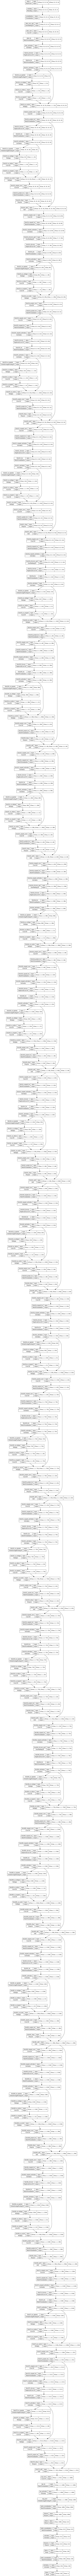

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_final, to_file='EN_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import time

model_final.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

mcp_save = ModelCheckpoint('Enet_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=2, verbose=1,)
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience=5)

start = time.time()
print("Training....")
model_final.fit(x_train, y_train,
              batch_size=32,
              epochs=15,
              validation_split=0.2,
              callbacks=[mcp_save, reduce_lr, early_stopping],
              shuffle=True,
              verbose=1)
end = time.time()
enb_time = int((end - start)/60)
print("Efficientnet Training took %f minutes"%(enb_time))

Training....


In [ ]:
# Test Accuracy
en_score = model_final.evaluate(x_test, y_test)
print('EfficientNet Test accuracy: %f  , took %d minutes' %(en_score[1], enb_time))